<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression

_Authors: Kevin Markham (Washington, D.C.), Ed Podojil (New York City)._

## Learning Objectives
- Define data modeling and simple linear regression.
- Build a linear regression model using a data set that meets the linearity assumption using the scikit-learn library.
- Understand and identify multicollinearity in a multiple regression.

### Lesson Guide
- [Introduce the Bikeshare Data Set](#introduce-the-bikeshare-dataset)
	- [Read in the  Capital Bikeshare Data](#read-in-the--capital-bikeshare-data)
	- [Visualizing the Data](#visualizing-the-data)
- [Linear Regression Basics](#linear-regression-basics)
	- [Form of Linear Regression](#form-of-linear-regression)
- [Overview of Supervised Learning](#overview-of-supervised-learning)
	- [Benefits and Drawbacks of scikit-learn](#benefits-and-drawbacks-of-scikit-learn)
	- [Requirements for Working With Data in scikit-learn](#requirements-for-working-with-data-in-scikit-learn)
	- [Building a Linear Regression Model in sklearn](#building-a-linear-regression-model-in-sklearn)
	- [scikit-learn's Four-Step Modeling Pattern](#scikit-learns--step-modeling-pattern)
- [Build a Linear Regression Model](#build-a-linear-regression-model)
- [Using the Model for Prediction](#using-the-model-for-prediction)
	- [Does the Scale of the Features Matter?](#does-the-scale-of-the-features-matter)
- [Work With Multiple Features](#work-with-multiple-features)
	- [Visualizing the Data](#visualizing-the-data-part-)
	- [Adding More Features to the Model](#adding-more-features-to-the-model)
- [What Is Multicollinearity?](#what-is-multicollinearity)
- [How to Select a Model](#how-to-select-a-model)
	- [Feature Selection](#feature-selection)
	- [Evaluation Metrics for Regression Problems](#evaluation-metrics-for-regression-problems)
	- [Comparing Models With Train/Test Split and RMSE](#comparing-models-with-traintest-split-and-rmse)
	- [Comparing Testing RMSE With Null RMSE](#comparing-testing-rmse-with-null-rmse)
- [Feature Engineering to Improve Performance](#feature-engineering-to-improve-performance)
	- [Handling Categorical Features](#handling-categorical-features)
	- [Feature Engineering](#feature-engineering)
- [Bonus Material: Regularization](#bonus-material-regularization)
	- [How Does Regularization Work?](#how-does-regularization-work)
	- [Lasso and Ridge Path Diagrams](#lasso-and-ridge-path-diagrams)
	- [Advice for Applying Regularization](#advice-for-applying-regularization)
	- [Ridge Regression](#ridge-regression)
- [Comparing Linear Regression With Other Models](#comparing-linear-regression-with-other-models)

<a id="introduce-the-bikeshare-dataset"></a>
## Introduce the Bikeshare Data Set
---

We'll be working with a data set from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

The objective of the competition is to predict total ridership of Capital Bikeshare in any given hour.

![](./assets/bikeshare.png)

Demand forecasting is a common data science application. If we can predict the quantity of demand, total ridership in a given hour, we can create analytical tools to improve the bikeshare system. 

##### Some applications would be:
* Find where to site new bikeshare stations and know how large of a station to build.
* Calculate the expected wear and tear on bikes and what the replacement costs will be.
* Use a slightly different research design to forecast full and empty stations and send a service vehicle to "rebalance" the bikes from one station to another, as sometimes bikeshare stations have no bikes or are completely full and prevent use of the station.

Businesses aren't new to demand forecasting, but older methods suffered from poor predictions at atypical small locations. Modern approaches incorporate clusters and online data from Twitter and Google Trends to improve prediction in these small locations.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

<a id="read-in-the--capital-bikeshare-data"></a>
### Read In the Capital Bikeshare Data

In [14]:
# Read the data and set the datetime as the index.
url = './data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

> * Notice that we used `index_col` to set an index or primary key for our data. In this case, the index of each row will be set to the value of its `datetime` field.
> * We also ask Pandas to parse dates (if `parse_dates=True`, for the index only). So, rather than reading in a string, Pandas converts the index string to a [`datetime` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html).

In [15]:
# Preview the first five rows of the DataFrame.
bikes.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0       0           1      1

##### How many features are there?

In [16]:
# There are currently 11 features. We can pull in the index (`datetime`) to help our models.
# Because we are predicting the `count` variable, it is not counted as a feature.



![](./assets/data-description.png)

##### What does each observation represent?

##### What is the response variable (as defined by Kaggle)?

##### "count" is a method in Pandas (and a very non-specific name), so it's best to name that column something else

In [17]:
# Use the .rename() method to rename count to total
bikes.rename(columns={'count':'total_rentals'}, inplace=True)


In general, you may want to rename columns if it is not obvious what might be stored in them. Although we will only rename the target column here, a few examples might be to rename:

| old name | new name |
| ---    | --- |
| temp | temp_celcius
| windspeed | windspeed_knots
| casual | num_casual_users
| registered | num_registered_users
| season | season_num
| holiday | is_holiday
| workingday | is_workingday
| humidity | humidity_percent

Without having to check, these new names make it obvious what is stored in each column. The downside is slightly longer column names, which could affect table readability in Jupyter. It would be ideal to use very specific names in CSV files to assist others reading them. In your own code, use whatever makes sense for your work -- if you are viewing lots of Pandas tables, you may want to use shorter names. However, readable specific names are preferred in Python code since it prevents mistakes.

<a id="visualizing-the-data"></a>
### Visualising the Data

It is important to have a general feeling for what the data looks like before building a model. **Ideally, before creating the model you would have some sense of which variables might matter most to predict the response**. This dataset is fairly intuitive (and the purpose of this lesson is not visualization), so we will keep the visualization short.

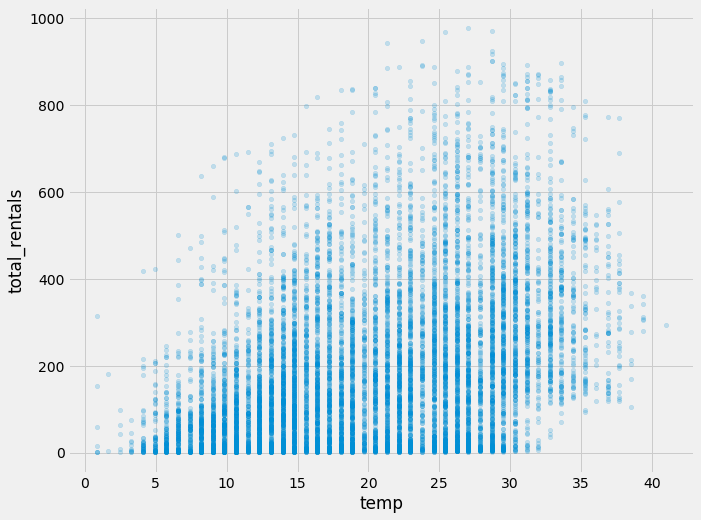

In [18]:
# Pandas (matplotlib) scatterplot
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2);

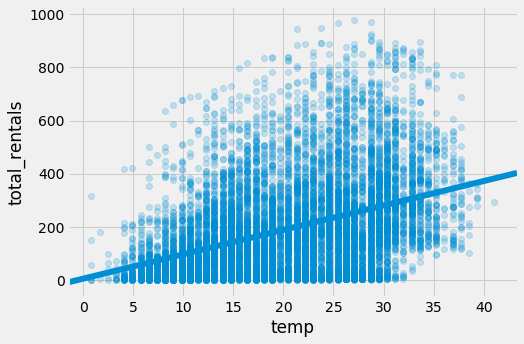

In [19]:
# Seaborn scatterplot with regression line
sns.lmplot(x='temp', y='total_rentals', data=bikes, 
           scatter_kws={'alpha':0.2}, aspect=1.5);

<a id="overview-of-supervised-learning"></a>
## Overview of Supervised Learning
---

![Supervised learning diagram](./assets/supervised-learning.jpeg)

<a id="benefits-and-drawbacks-of-scikit-learn"></a>
### Scikit-learn: benefits and drawbacks

**Benefits:**

- Consistent interface to machine learning models.
- Provides many tuning parameters but with sensible defaults.
- Exceptional documentation.
- Rich set of functionality for companion tasks.
- Active community for development and support.

**Potential drawbacks:**

- Harder (than R) to get started with machine learning.
- Less emphasis (than R) on model interpretability.
    - scikit-learn tends not to run detailed statistical tests, e.g. ANOVA.
    - For more detail on model fit, try the `statsmodels` library.

Ben Lorica: [Six Reasons Why I Recommend scikit-learn](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html)

<a id="requirements-for-working-with-data-in-scikit-learn"></a>
### Requirements for Working With Data in scikit-learn

1. Features and labels should be separate objects.
2. Features and labels should be entirely numeric.
3. Features and labels should be NumPy arrays (or easily converted to NumPy arrays).
4. Features and labels should have specific shapes (outlined below).

<a id="linear-regression-basics"></a>
## Linear Regression Basics
---

### What does it look like?

![](./assets/linear-regressions.jpeg)

<a id="form-of-linear-regression"></a>
### Form of Linear Regression

Each straight line is uniquely defined by two parameters: 
- the y-intercept
- the slope of the line

We are often taught the formula for a line is: $y = mx + b$.

Note this can alternatively be written: $y = \beta_0 + \beta_1 x$.

![](./assets/residuals.jpeg)

![](./assets/formulas.jpeg)

Here, we will generalize this to $n$ independent variables as follows:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

- $y$ is the dependent variable (the response).
- $\beta_0$ is the y-intercept (the baseline).
- $\beta_1$ is the coefficient for $x_1$ (the effect of the first feature).
- $\beta_n$ is the coefficient for $x_n$ (the effect of the nth feature).
- $x_1,\ldots,x_n$ are the independent variables (the measurements).
- $\epsilon$ is the residual

##### A practical example of this applied to our data might be:

$total\_rides = 20 + -2 \cdot temp + -3 \cdot windspeed\ +\ ...\ +\ 0.1 \cdot registered$

This equation is still called **linear** because the highest degree of the independent variables (e.g. $x_i$) is 1. The coefficients $\beta$ are constants, defining the effect of each feature (e.g. _temperature_ or _wind speed_) on the dependent variable $total\_rides$.

### Least Squares

The $\beta$ values are called the **model parameters** or **model coefficients **:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](./assets/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

<a id="building-a-linear-regression-model-in-sklearn"></a>
### Building a Linear Regression Model in sklearn

##### Create a feature matrix called X that holds a `DataFrame` with only the `temp` variable and a `Series` called y that has the "total_rentals" column.

In [20]:
# Create X and y.
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total_rentals

In [21]:
# Check X's type.
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [22]:
# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [23]:
# Check X's shape (m = number of observations, n = number of features).
print((X.shape))

(10886, 1)


In [24]:
# Check y's shape (single dimension with length m).
# The comma indicates the datatype is a tuple.
print((y.shape))

(10886,)


<a id="scikit-learns--step-modeling-pattern"></a>
### scikit-learn's Four-Step Modeling Pattern

**Step 1:** Import the class you plan to use.

In [25]:
from sklearn.linear_model import LinearRegression

**Step 2:** "Instantiate" the "estimator."

- "Estimator" is scikit-learn's term for "model."
- "Instantiate" means "make an instance of."

In [26]:
# Create an instance/object of a LinearRegression class.
lin_reg = LinearRegression()
type(lin_reg)

sklearn.linear_model.base.LinearRegression

- Created an object that "knows" how to do linear regression, and is just waiting for data to be passed.
- Name of the object does not matter.
- All parameters not specified are set to their defaults.
- Can specify tuning parameters (aka "hyperparameters") during this step. 

To view the possible parameters, evaluate the newly instantiated model, as follows:

In [27]:
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

To get more details use the `help` built-in function: 

In [28]:
help(lin_reg)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, 

**Step 3:** Fit the model to data (aka "model training").

- The model is "learning" the relationship between X and y in our "training data."
- Meaning it eatimates the values of the model parameters $\beta_i$

In [29]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- Once a model has been fit to data, it's called a "fitted model."

**Step 4:** Predict the response for a new observation.

- We are using the information learned during the model training process and extrapolate it to the new observations.
- New observations are called "out-of-sample" data.

In [30]:
# Per future warning, one-dimensional arrays must be reshaped using the following.
lin_reg.predict(np.array([0]).reshape(1,-1))

array([6.04621296])

In [31]:
testarray = [[0]]
lin_reg.predict(testarray)

array([6.04621296])

In [32]:
lin_reg.predict([[100]])

array([923.1002611])

Let's ask the model to make two predictions, one when the `temp` is 0 and another when the `temp` is 10. To do this, our feature matrix should always be a **2-D array** where each row is a list of features. Since we only have a single feature, the temperature, each row will contain only a single value.

In [33]:
X_new = [[0], [10]]
lin_reg.predict(X_new)

array([ 6.04621296, 97.75161777])

What we just predicted using our model is, "If the temperature is 0 degrees, the total number of bike rentals will be ~6.046, and if the temperature is 10 degrees the total number of bike rentals will ~97.751."

<a id="build-a-linear-regression-model"></a>
## Build a Linear Regression Model for Bikeshare Data
---

Let's specifically make a linear regression model and look at the intercept and coefficients.

#### Instantiate and fit a `LinearRegression` model on X and y from the `linear_model` section of scikit-learn.

In [28]:
# Import, instantiate, fit.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# Print the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

6.04621295961681
[9.17054048]


Interpreting the intercept ($\beta_0$):

- It is the value of $y$ when all independent variables are 0.
- Here, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- **Note:** It does not always make sense to interpret the intercept. (Why?)

Interpreting the "temp" coefficient ($\beta_1$):

- **Interpretation:** An increase of 1 degree Celcius is _associated with_ increasing the number of total rentals by $\beta_1$.
- Here, a temperature increase of 1 degree Celsius is _associated with_ a rental increase of 9.17 bikes.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in temperature was associated with a **decrease** in total rentals.
- $\beta_1$ would be **zero** if temperature is not associated with total rentals.

<a id="using-the-model-for-prediction"></a>
## Using the Model for Prediction
---

While plenty of insight can be found in reading coefficients, the most common uses of data science focus on prediction. In scikit-learn we can make predictions from a fitted model using `.predict()`, but we will first go through the calculation by hand to understand it.

##### How many bike rentals would we predict if the temperature was 25 degrees Celsius?

In [35]:
# Manually calculate the prediction.
25*9.17054048 + 6.04621295961681

235.3097249596168

In [36]:
# Now use the .predict() method and compare your results.
lin_reg.predict([[25]])

array([235.309725])

<a id="does-the-scale-of-the-features-matter"></a>
### Does the Scale of the Features Matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [37]:
# We'll define a function to do that.
def celsius_to_fahrenheit(temp_C):
    return temp_C * 1.8 + 32

##### Convert 25 degrees Celsius to Fahrenheit.

In [38]:
celsius_to_fahrenheit(25)

77.0

##### Predict rentals for 77 degrees Fahrenheit.

In [39]:
lin_reg.predict([[77]])

array([712.17783003])

> **Check for understanding:** is this a correct prediction?

##### Train the model on Fahrenheit temperature instead

In [40]:
# Create a new column for Fahrenheit temperature.
bikes['temp_F'] = celsius_to_fahrenheit(bikes.temp)
bikes.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  total_rentals  \
datetime                                                                      
2011-01-01 00:00:00        81        0.0       3          13             16   
2011-01-01 01:00:00        80        0.0       8          32             40   
2011-01-01 02:00:00        80        0.0       5          27             32   
2011-01-01 03:00:00        75        0.0       3          10             13   
2011-01-01 04:00:00        75        0.0       0           1              1   

                     temp_F  
datetime                     
2011-01-01 00:00:00  49.712  
2011-01-01 01:00:00  48.236  
2011-01-01 02:00:00  48.236  
2011-01-01 03:00:00  49.712  
2011-01-01 04:00:00  49.712

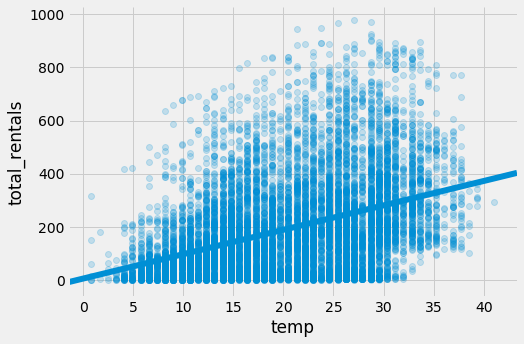

In [41]:
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

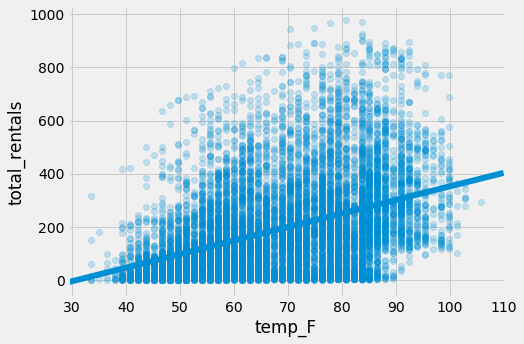

In [42]:
# Seaborn scatterplot with regression line
sns.lmplot(x='temp_F', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

##### Rebuild the `LinearRegression` from above using the `temp_F` feature instead.

In [43]:
# Create X and y.
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)


-156.9856178212945
[5.09474471]


> **Check for understanding:** the y-intercept is negative now, why?

**Conclusion:** When changing the scale of the features, we need to train the model from scratch.

In [44]:
# Remove the temp_F column.
bikes.drop('temp_F', axis=1, inplace=True)

<a id="work-with-multiple-features"></a>
## Work With Multiple Features
---

We have demonstrated simple linear regression with one feature to gain an intuition, but the benefit of modeling is the ability to reason about hundreds of features at once. There is no limit to the number of features you can use. However, often a small set of features accounts for most of the variance (assuming there is a linear relationship at all). We will start by using four features.

> A regression analysis with one dependent variable and several independent variables is called **multiple regression**. It is often mistakenly called multivariate, however, a **multivariate regression** is a model with several response variables.

<a id="visualizing-the-data-part-"></a>
### Visualising the Data

##### Explore more features.

In [45]:
# Create feature column variables
feature_cols = ['temp', 'season', 'weather', 'humidity']

##### Create a subset of scatterplot matrix using Seaborn.
We can use pairplot with the y_vars argument to only show relationships with the `total_rentals` variable

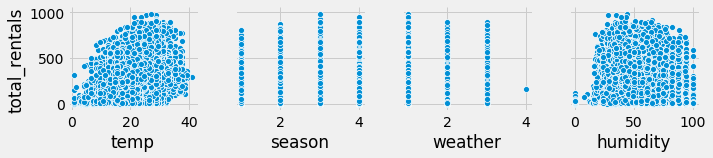

In [46]:
# Multiple scatter plots in Seaborn.
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals');

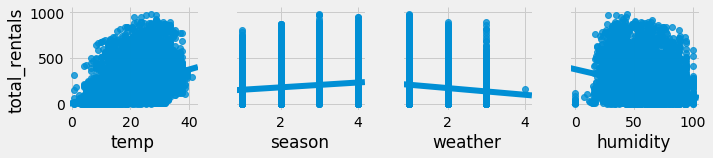

In [47]:
# We can add a regression line to our scatter plots by setting the parameter kind to "reg".
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals', kind='reg');

##### Recreate the same functionality using Pandas.

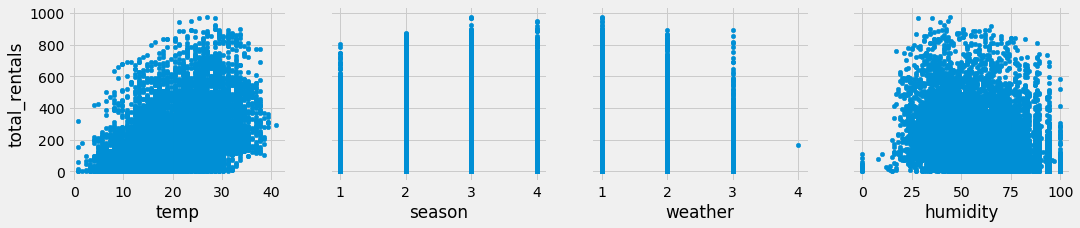

In [48]:
# Multiple scatter plots in Pandas (i.e. using matplotlib)
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total_rentals', ax=axs[index], figsize=(16, 3))

> **Question:** are you seeing anything you didn't expect?

##### Explore the season variable using a cross-tab.

In [49]:
# Cross-tabulation of season and month
pd.crosstab(bikes.season, bikes.index.month)

col_0    1    2    3    4    5    6    7    8    9    10   11   12
season                                                            
1       884  901  901    0    0    0    0    0    0    0    0    0
2         0    0    0  909  912  912    0    0    0    0    0    0
3         0    0    0    0    0    0  912  912  909    0    0    0
4         0    0    0    0    0    0    0    0    0  911  911  912

> Recall the description of the _season_ column. Do you see anything suspicious? Note: the data shows the usage of bikes in Washington, D.C.

##### Fix the season column.

Seems like there is an error! This might affect our results so let's fix it before we continue. 

In [50]:
# spring
bikes.season[(bikes.index.month == 3) | (bikes.index.month == 4) | (bikes.index.month == 5)] = 1
#summer
bikes.season[(bikes.index.month == 6) | (bikes.index.month == 7) | (bikes.index.month == 8)] = 2
# autumn
bikes.season[(bikes.index.month == 9) | (bikes.index.month == 10) | (bikes.index.month == 11)] = 3
# winter
bikes.season[(bikes.index.month == 12) | (bikes.index.month == 1) | (bikes.index.month == 2)] = 4

C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Yoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is tryi

In [51]:
pd.crosstab(bikes.season, bikes.index.month)

col_0    1    2    3    4    5    6    7    8    9    10   11   12
season                                                            
1         0    0  901  909  912    0    0    0    0    0    0    0
2         0    0    0    0    0  912  912  912    0    0    0    0
3         0    0    0    0    0    0    0    0  909  911  911    0
4       884  901    0    0    0    0    0    0    0    0    0  912

##### Explore the season variable using a box plot.

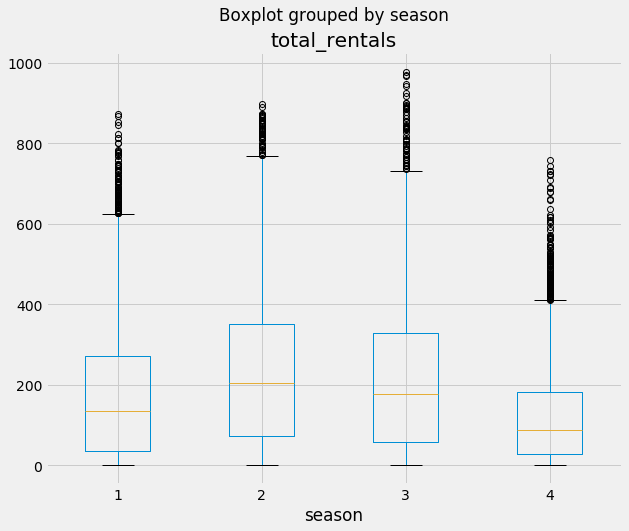

In [52]:
# Box plot of rentals, grouped by season
bikes.boxplot(column='total_rentals', by='season');

> **Note:** a straight line can't capture the nonlinear relationship between the variables.

##### Look at rentals over time.

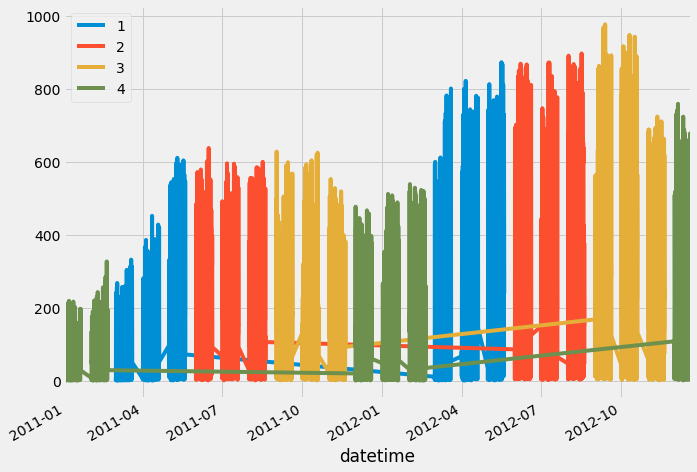

In [22]:
# Line plot of rentals
bikes.total_rentals.groupby(bikes.season).plot(legend=True);

##### Look at the correlation matrix for the bikes `DataFrame`.

In [23]:
# Correlation matrix (ranges from 1 to -1)
bikes.corr()

season   holiday  workingday   weather      temp     atemp  \
season         1.000000  0.041326   -0.029800  0.023406 -0.434241 -0.433335   
holiday        0.041326  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday    -0.029800 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather        0.023406 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp          -0.434241  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp         -0.433335 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity       0.042525  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed     -0.052774  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual        -0.212438  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered    -0.072191 -0.020956    0.119460 -0.109340  0.318571  0.314635   
total_rentals -0.118785 -0.005393    0.011594 -0.128655  0.394454  0.389784   

               humidity  windspeed    casual  registered  total_rentals  
season         0.042525  -0.052774 -0.212438   -0.072191      -0.118785  
holiday        0.001929   0.008409  0.043799   -0.020956      -0.005393  
workingday    -0.010880   0.013373 -0.319111    0.119460       0.011594  
weather        0.406244   0.007261 -0.135918   -0.109340      -0.128655  
temp          -0.064949  -0.017852  0.467097    0.318571       0.394454  
atemp         -0.043536  -0.057473  0.462067    0.314635       0.389784  
humidity       1.000000  -0.318607 -0.348187   -0.265458      -0.317371  
windspeed     -0.318607   1.000000  0.092276    0.091052       0.101369  
casual        -0.348187   0.092276  1.000000    0.497250       0.690414  
registered    -0.265458   0.091052  0.497250    1.000000       0.970948  
total_rentals -0.317371   0.101369  0.690414    0.970948       1.000000

##### Use a heat map to make it easier to read the correlation matrix.

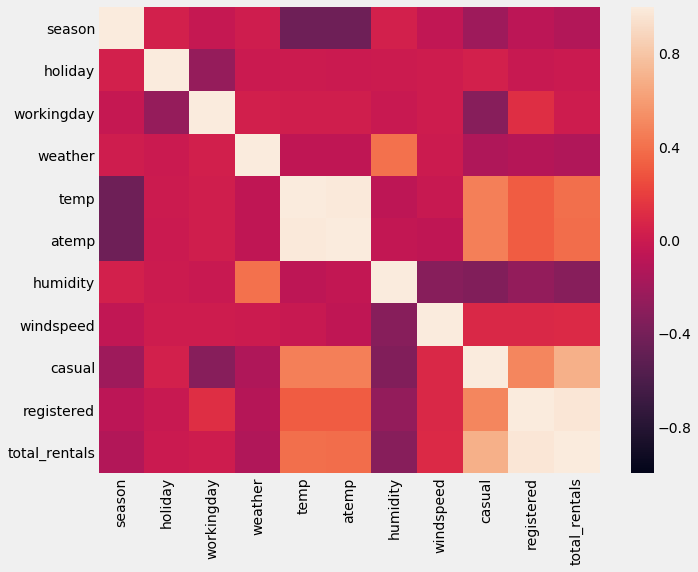

In [25]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(bikes.corr(), vmin=-1, vmax=1);

> **Question:** what relationships do you notice?

<a id="adding-more-features-to-the-model"></a>
### Adding More Features to the Model

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

- For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

- For a linear regression, we want these variables to be largely independent of one another, but all of them should help explain the $y$ variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

##### Create another `LinearRegression` instance that is fit using temp, season, weather, and humidity.

In [56]:
# Create a list of features.
feature_cols = ['temp','season','weather','humidity']

In [57]:
# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

141.10253169718965
[ 9.44250129 11.36100724  3.9300876  -2.81957696]


#### Display the linear regression coefficient along with the feature names.

In [58]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, lin_reg.coef_))

[('temp', 9.442501288197489),
 ('season', 11.361007241062941),
 ('weather', 3.9300876034077357),
 ('humidity', -2.819576964490643)]

Interpreting the coefficients:

- Holding all other features fixed, a 1-unit increase in temperature is associated with a rental _increase_ of 9.44 bikes.
- Holding all other features fixed, a 1-unit increase in season is associated with a rental _increase_ of 11.36 bikes.
- Holding all other features fixed, a 1-unit increase in weather is associated with a rental _increase_ of 3.93 bikes.
- Holding all other features fixed, a 1-unit increase in humidity is associated with a rental _decrease_ of 2.82 bikes.

**Check for undestanding:** does anything look incorrect and does not reflect reality?

<a id="what-is-multicollinearity"></a>
## What Is Multicollinearity?
---

Multicollinearity happens when two or more features are highly correlated with each other. The problem is that due to the high correlation, it's hard to disambiguate which feature has what kind of effect on the outcome. In other words, the features mask each other. 

##### With the bikeshare data, let's look at three variables: actual temperature, "feel" temperature, and guest ridership.

            temp     atemp    casual
temp    1.000000  0.984948  0.467097
atemp   0.984948  1.000000  0.462067
casual  0.467097  0.462067  1.000000
AxesSubplot(0.08,0.07;0.696x0.81)


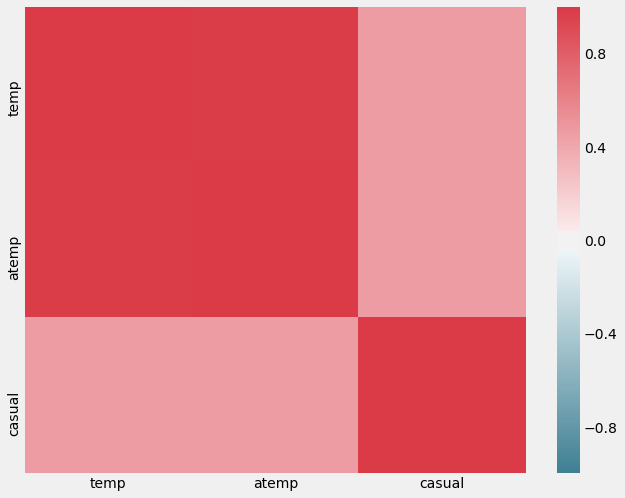

In [53]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp', 'atemp', 'casual']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap, vmin= -1 , vmax= 1))

##### `temp` and `atemp` are highly correlated. Let's use them to create a linear model that predicts `total_rentals`.

In [59]:
# Create a list of features.
feature_cols = ['temp', 'atemp']

In [60]:
# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

4.248132645803736
[8.19865874 0.90720808]


##### Go back and remove either `temp` or `atemp` from the feature list. How do the coefficients change? 

In [64]:
# A:
feature_cols = ['temp']

# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

6.04621295961681
[9.17054048]


> Which of the two models is more accurate in predictin the `total_rentals` ?

<a id="how-to-select-a-model"></a>
## How to Select a Model
---

We can make linear models now, but how do we select the best model to use for our applications? We will offer a general procedure and a simple metric that works well in many cases. That said, it's important to keep the business context in mind and know that there are alternative metrics that can work better.

### Feature Selection

There are many different approaches to selecting which features to include in the model. They vary in complexity and assumptions they rely on. However, before trying more complicated solutions, try answering the following questions:
* Are there features that have zero standard deviation i.e. the value does not change across the dataset. These features should be dropped. 
* Are there features that have very high standard deviation? Is there any relationship between them and the response variable? Calculate the correlation coefficient and use scatter plots to check if there is any effect. If nothing can be seen such features are probably too noisy and should be dropped.
* Are there two features that are highly correlated (Pearson's correlation coefficient is close to -1 or 1)? One of these features should be dropped. 

<a id="feature-selection"></a>
### Model Evaluation

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

#### R-squared

R-squared ($R^2$) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

via [Investopedia](https://www.investopedia.com/terms/r/r-squared.asp)

Why not use p-values or R-squared for feature selection?

- Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- If all of the assumptions of a linear model are met, p-values suggest a coefficient that differs from zero at a level of statistical significance. This does not mean that
    1. the feature _causes_ the response
    2. the feature strongly _predicts_ the response. 
- Adding features to your model that are unrelated to the response will always increase the R-squared value. Adjusted R-squared is adjusted for the number of model parameters however it does not sufficiently account for this.

More generally:

- This course focuses on general purpose approaches that can be applied to any model, rather than model-specific approaches.
 - p-values and R-squared are **proxies** for our goal of generalization. 

**A common Machine Learning methodology is to use a train/test split and cross-validation attempt to directly estimate how well the model will generalize to out-of-sample data.**

![](./assets/train-test.jpeg)

Instead of using the whole dataset we split it into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set.

<a id="evaluation-metrics-for-regression-problems"></a>
### Evaluation Metrics for Regression Problems

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values.

Here are three common evaluation metrics for regression problems:

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [33]:
# Example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

#### Calculate MAE, MSE, and RMSE using imports from sklearn metrics and NumPy.

In [59]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.75
MSE: 17.25
RMSE: 4.153311931459037


Let's compare these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. Also, MSE is continuous and differentiable, making it easier to use than MAE for optimization.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to **minimise** them.

Here's an additional example, to demonstrate how MSE/RMSE punishes larger errors:

In [58]:
# Same true values as above
true = [10, 7, 5, 5]

# New set of predicted values
pred = [8, 6, 5, 13]

# MAE is the same as before.
print('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before.
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.75
MSE: 17.25
RMSE: 4.153311931459037


<a id="comparing-models-with-traintest-split-and-rmse"></a>
### Comparing Models With Train/Test Split and RMSE

In [62]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    y_pred = lin_reg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [63]:
# Compare different sets of features.
print(train_test_rmse(bikes, ['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(bikes, ['temp', 'season', 'weather']))
print(train_test_rmse(bikes, ['temp', 'season', 'humidity']))

157.26262677009703
164.5198819531141
157.2065496641839


In [39]:
# Using these as features is not allowed!
print(train_test_rmse(bikes, ['casual', 'registered']))

6.465079976076669e-14


<a id="comparing-testing-rmse-with-null-rmse"></a>
### Comparing Testing RMSE With Null RMSE

Null RMSE is the RMSE that could be achieved by always predicting the mean response value (dummy estimator). It is a benchmark against which you may want to measure your regression model.

In [64]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

array([192.26451139, 192.26451139, 192.26451139, ..., 192.26451139,
       192.26451139, 192.26451139])

In [68]:
# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))


179.57906896465727

<a id="feature-engineering-to-improve-performance"></a>
## Feature Engineering to Improve Performance
---

Machine learning models are very powerful, but they cannot automatically handle every aspect of our data. We have to explicitly modify our features to have relationships that our models can understand. In this case, we will need to pull out features to have a linear relationship with our response variable.


<a id="handling-categorical-features"></a>
### Handling Categorical Features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** Transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** Use one-hot vectors (aka 'dummy encoding'). Here, each possible category would become a separate feature.

What are the categorical features in our data set?

- **Ordered categories:** `weather` (already encoded with sensible numeric values)
- **Unordered categories:** `season` (needs one-hot labelling), `holiday`, `workingday` (both already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an ordered relationship. Instead, we create multiple dummy variables.

##### Create dummy variables using `get_dummies` from Pandas.

In [81]:
season_dummies = pd.get_dummies(bikes.season, prefix='season')
season_dummies.head()

season_1  season_2  season_3  season_4
datetime                                                   
2011-01-01 00:00:00         0         0         0         1
2011-01-01 01:00:00         0         0         0         1
2011-01-01 02:00:00         0         0         0         1
2011-01-01 03:00:00         0         0         0         1
2011-01-01 04:00:00         0         0         0         1

##### Inspect the `DataFrame` of `dummies`.

In [74]:
# Print five random rows.
season_dummies.sample(n=5, random_state=1)    #just look for random samples

season_1  season_2  season_3  season_4
datetime                                                   
2011-09-05 11:00:00         0         0         1         0
2012-03-18 04:00:00         1         0         0         0
2012-10-14 17:00:00         0         0         1         0
2011-04-04 15:00:00         1         0         0         0
2012-12-11 02:00:00         0         0         0         1

> However, we actually only need three dummy variables (not four), and thus we'll drop the first dummy variable. Why? 

Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the baseline level.

This circles back to the concept of multicollinearity, except instead of one feature being highly correlated to another, the information gained from three features is directly correlated to the fourth.

##### Drop the first column.

In [75]:
# A:

season_dummies.drop('season_1',inplace = True, axis = 1)

#### Reinspect the `DataFrame` of `dummies`.

In [76]:
# Print five random rows.
season_dummies.sample(n=5, random_state=1)   #just look for random samples

season_2  season_3  season_4
datetime                                         
2011-09-05 11:00:00         0         1         0
2012-03-18 04:00:00         0         0         0
2012-10-14 17:00:00         0         1         0
2011-04-04 15:00:00         0         0         0
2012-12-11 02:00:00         0         0         1

In general, if you have a categorical feature with $k$ possible values, you create $k-1$ dummy variables.

If that's confusing, think about why we only need one dummy variable for `holiday`, not two dummy variables (`holiday_yes` and `holiday_no`).

##### We now need to concatenate the two `DataFrames` together.

In [77]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
bikes_dummies = pd.concat([bikes, season_dummies], axis=1)

# Print 5 random rows.
bikes_dummies.sample(n=5, random_state=1)

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-09-05 11:00:00       3        1           0        2  28.70  33.335   
2012-03-18 04:00:00       1        0           0        2  17.22  21.210   
2012-10-14 17:00:00       3        0           0        1  26.24  31.060   
2011-04-04 15:00:00       1        0           1        1  31.16  33.335   
2012-12-11 02:00:00       4        0           1        2  16.40  20.455   

                     humidity  windspeed  casual  registered  total_rentals  \
datetime                                                                      
2011-09-05 11:00:00        74    11.0014     101         207            308   
2012-03-18 04:00:00        94    11.0014       6           8             14   
2012-10-14 17:00:00        44    12.9980     193         346            539   
2011-04-04 15:00:00        23    36.9974      47          96            143   
2012-12-11 02:00:00        66    22.0028       0           1              1   

                     season_2  season_3  season_4  
datetime                                           
2011-09-05 11:00:00         0         1         0  
2012-03-18 04:00:00         0         0         0  
2012-10-14 17:00:00         0         1         0  
2011-04-04 15:00:00         0         0         0  
2012-12-11 02:00:00         0         0         1

##### Rerun the linear regression with dummy variables included.

In [78]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('temp', 12.53986585275026),
 ('season_2', -73.92746473960455),
 ('season_3', 34.731483497722046),
 ('season_4', 33.05605584945056),
 ('humidity', -2.8344048609434935)]

How do we interpret the season coefficients? They are measured against the baseline (spring):

- Holding all other features fixed, summer is associated with a rental _decrease_ of 73.93 bikes compared to the spring.
- Holding all other features fixed, fall is associated with a rental _increase_ of 34.73 bikes compared to the spring.
- Holding all other features fixed, winter is associated with a rental _increase_ of 33.1 bikes compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our interpretation of the coefficients.

> In most situations, it is best to have the dummy that is your baseline be the category that has the largest representation.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

In [84]:
# Compare original season variable with dummy variables.
print(train_test_rmse(bikes_dummies, ['temp', 'season', 'humidity']))
print(train_test_rmse(bikes_dummies, ['temp', 'season_2', 'season_3', 'season_4', 'humidity']))
print(train_test_rmse(bikes_dummies, ['temp', 'season_2', 'season_3', 'season_4', 'humidity','holiday','workingday']))

157.2065496641839
153.21390898752378
153.20688238336814


<a id="feature-engineering"></a>
### Feature Engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7 a.m. to 8 p.m., and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

##### Extract hour of the day to use as a feature.

In [85]:
bikes['hour'] = bikes.index.hour

##### Encode `hour` as a categorical feature.

In [89]:
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
#hour_dummies.head()

In [90]:
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
#hour_dummies.head()


In [91]:
bikes = pd.concat([bikes, hour_dummies], axis=1)
bikes.head()


season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       4        0           0        1  9.84  14.395   
2011-01-01 01:00:00       4        0           0        1  9.02  13.635   
2011-01-01 02:00:00       4        0           0        1  9.02  13.635   
2011-01-01 03:00:00       4        0           0        1  9.84  14.395   
2011-01-01 04:00:00       4        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  ...  hour_14  \
datetime                                                      ...            
2011-01-01 00:00:00        81        0.0       3          13  ...        0   
2011-01-01 01:00:00        80        0.0       8          32  ...        0   
2011-01-01 02:00:00        80        0.0       5          27  ...        0   
2011-01-01 03:00:00        75        0.0       3          10  ...        0   
2011-01-01 04:00:00        75        0.0       0           1  ...        0   

                     hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
datetime                                                                    
2011-01-01 00:00:00        0        0        0        0        0        0   
2011-01-01 01:00:00        0        0        0        0        0        0   
2011-01-01 02:00:00        0        0        0        0        0        0   
2011-01-01 03:00:00        0        0        0        0        0        0   
2011-01-01 04:00:00        0        0        0        0        0        0   

                     hour_21  hour_22  hour_23  
datetime                                        
2011-01-01 00:00:00        0        0        0  
2011-01-01 01:00:00        0        0        0  
2011-01-01 02:00:00        0        0        0  
2011-01-01 03:00:00        0        0        0  
2011-01-01 04:00:00        0        0        0  

[5 rows x 35 columns]

In [95]:
bikes_dummies = pd.concat([bikes_dummies, hour_dummies], axis=1)

In [97]:
bikes_dummies.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       4        0           0        1  9.84  14.395   
2011-01-01 01:00:00       4        0           0        1  9.02  13.635   
2011-01-01 02:00:00       4        0           0        1  9.02  13.635   
2011-01-01 03:00:00       4        0           0        1  9.84  14.395   
2011-01-01 04:00:00       4        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  ...  hour_14  \
datetime                                                      ...            
2011-01-01 00:00:00        81        0.0       3          13  ...        0   
2011-01-01 01:00:00        80        0.0       8          32  ...        0   
2011-01-01 02:00:00        80        0.0       5          27  ...        0   
2011-01-01 03:00:00        75        0.0       3          10  ...        0   
2011-01-01 04:00:00        75        0.0       0           1  ...        0   

                     hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
datetime                                                                    
2011-01-01 00:00:00        0        0        0        0        0        0   
2011-01-01 01:00:00        0        0        0        0        0        0   
2011-01-01 02:00:00        0        0        0        0        0        0   
2011-01-01 03:00:00        0        0        0        0        0        0   
2011-01-01 04:00:00        0        0        0        0        0        0   

                     hour_21  hour_22  hour_23  
datetime                                        
2011-01-01 00:00:00        0        0        0  
2011-01-01 01:00:00        0        0        0  
2011-01-01 02:00:00        0        0        0  
2011-01-01 03:00:00        0        0        0  
2011-01-01 04:00:00        0        0        0  

[5 rows x 37 columns]

##### Generate a `daytime` variable based on hour of the day.

In [108]:
bikes_dummies['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)

In [109]:
bikes_dummies['daytime'].head(10)

datetime
2011-01-01 00:00:00    0
2011-01-01 01:00:00    0
2011-01-01 02:00:00    0
2011-01-01 03:00:00    0
2011-01-01 04:00:00    0
2011-01-01 05:00:00    0
2011-01-01 06:00:00    0
2011-01-01 07:00:00    1
2011-01-01 08:00:00    1
2011-01-01 09:00:00    1
Name: daytime, dtype: int32

##### Test the root mean squared error of our various `hour` encodings.

In [111]:
print(train_test_rmse(bikes, ['hour']))
print(train_test_rmse(bikes, bikes.columns[bikes.columns.str.startswith('hour_')]))
print(train_test_rmse(bikes, ['daytime']))

165.67174264111398
128.31120502811194
144.89116360237938


<a id="bonus-material-regularization"></a>
## Bonus Material: Regularization
---

- Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them toward zero.
- It reduces model variance and thus minimizes overfitting.
- If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.

Our goal is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.

<a id="how-does-regularization-work"></a>
### How Does Regularization Work?

For a normal linear regression model, we estimate the coefficients using the least squares criterion, which minimizes the residual sum of squares (RSS).

For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.

**Ridge regression** (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the number of features.
- $\beta_j$ is a model coefficient.
- $\alpha$ is a tuning parameter:
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.

<a id="lasso-and-ridge-path-diagrams"></a>
### Lasso and Ridge Path Diagrams

A larger alpha (toward the left of each diagram) results in more regularization:

- Lasso regression shrinks coefficients all the way to zero, thus removing them from the model.
- Ridge regression shrinks coefficients toward zero, but they rarely reach zero.

Source code for the diagrams: [Lasso regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html) and [Ridge regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

![Lasso and Ridge Coefficient Plots](./assets/lasso_ridge_path.png)

<a id="advice-for-applying-regularization"></a>
### Advice for Applying Regularization

**Should features be standardized?**

- Yes, because otherwise, features would be penalized simply because of their scale.
- Also, standardizing avoids penalizing the intercept, which wouldn't make intuitive sense.

**How should you choose between lasso regression and ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- Ridge can work particularly well if there is a high degree of multicollinearity in your model.
- If model performance is your primary concern, it is best to try both.
- Elastic net regression is a combination of lasso regression and ridge Regression.

<a id="ridge-regression"></a>
### Ridge Regression

- [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation
- **alpha:** must be positive, increase for more regularization
- **normalize:** scales the features (without using StandardScaler)

In [127]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'atemp', 'season_2', 'season_3', 'season_4', 'humidity']

X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [133]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0, normalize=True)

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

156.76770129535126


In [130]:
# Coefficients for a non-regularized linear regression
list(zip(feature_cols, ridgereg.coef_))
#print(ridgereg.intercept_)

[('temp', 9.201384897482834),
 ('atemp', 2.8986062857722437),
 ('season_2', -69.42116869440282),
 ('season_3', 34.36272043525899),
 ('season_4', 32.51744816988261),
 ('humidity', -2.879431988816038)]

To interpret these coefficients we need to convert them back to original units, which is a reason to do normalization by hand. However, in this form the coefficients have a special meaning. The intercept is now the average of our outcome, and the magnitude of each coefficient in the model is a measure of how important it is in the model. We call this feature importance.

In [134]:
# Try alpha=0.1.
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

157.290971781031


In [132]:
# Examine the coefficients.
list(zip(feature_cols, ridgereg.coef_))

[('temp', 5.544760454261789),
 ('atemp', 4.574113003086301),
 ('season_2', -46.5889784855128),
 ('season_3', 33.29008040753173),
 ('season_4', 18.288657837187856),
 ('humidity', -2.660920152271169)]

While the MSE barely improved, we can see there are significant changes in the weight of our coefficients.  Particularly `season_2` whose coefficient has greatly decreased toward 0.

Fitting and using a Lasso Regression in scikit-learn is very similar.  

In addition to the typical [lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) there is a third type of regression, [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) which combines the penalties of the ridge and lasso methods.

<a id="comparing-linear-regression-with-other-models"></a>
## Comparing Linear Regression With Other Models

Advantages of linear regression:

- Simple to explain.
- Highly interpretable.
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Well understood.

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response.
- Performance is (generally) not competitive with the best supervised learning methods due to high bias.
- Can't automatically learn feature interactions.